<a href="https://colab.research.google.com/github/OMG0718/Convertion-of-ONNX-to-HEF/blob/main/Copy_of_Raspberry_Pi_AI_Kit_Custom_YOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Check** **Resource**

In [1]:
!nvidia-smi

Thu Jun 12 05:46:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# **Install YOLOV8**

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.1.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 46.3/112.6 GB disk)


# **Exporting Dataset**

In [9]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gMUfs4AH3ZbWn8eO3hoJ")
project = rf.workspace("basketballtrain").project("basketball_net")
version = project.version(3)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to basketball_net-3 in yolov8:: 100%|██████████| 642/642 [00:00<00:00, 8081.15it/s]


# **Custom** **Training**

In [6]:
%cd /content/datasets/
%ls

!pip install torch==2.1.2 torchvision --upgrade

!pip uninstall numpy -y
!pip install numpy==1.26.4



/content/datasets
basketball_net-3/
  Using cached torchvision-0.22.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached torchvision-0.22.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.20.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.20.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.19.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.0 kB)
  Using cached torchvision-0.19.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.0 kB)
  Using cached torchvision-0.18.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requi

In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/basketball_net-3/data.yaml epochs=100 batch=16 imgsz=640 plots=True
#!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 batch=16 imgsz=640 plots=True amp=True lr0=0.01 augment=True save_period=10 patience=5


100% 21.5M/21.5M [00:00<00:00, 39.8MB/s]
New https://pypi.org/project/ultralytics/8.3.153 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.1.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/basketball_net-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffe

# **Confusion Matrix**

In [4]:
%cd {HOME}/runs/detect/train
!ls

/content/runs/detect/train
args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1710.jpg
events.out.tfevents.1749706300.945170d3c453.3293.0  train_batch1711.jpg
F1_curve.png					    train_batch1712.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


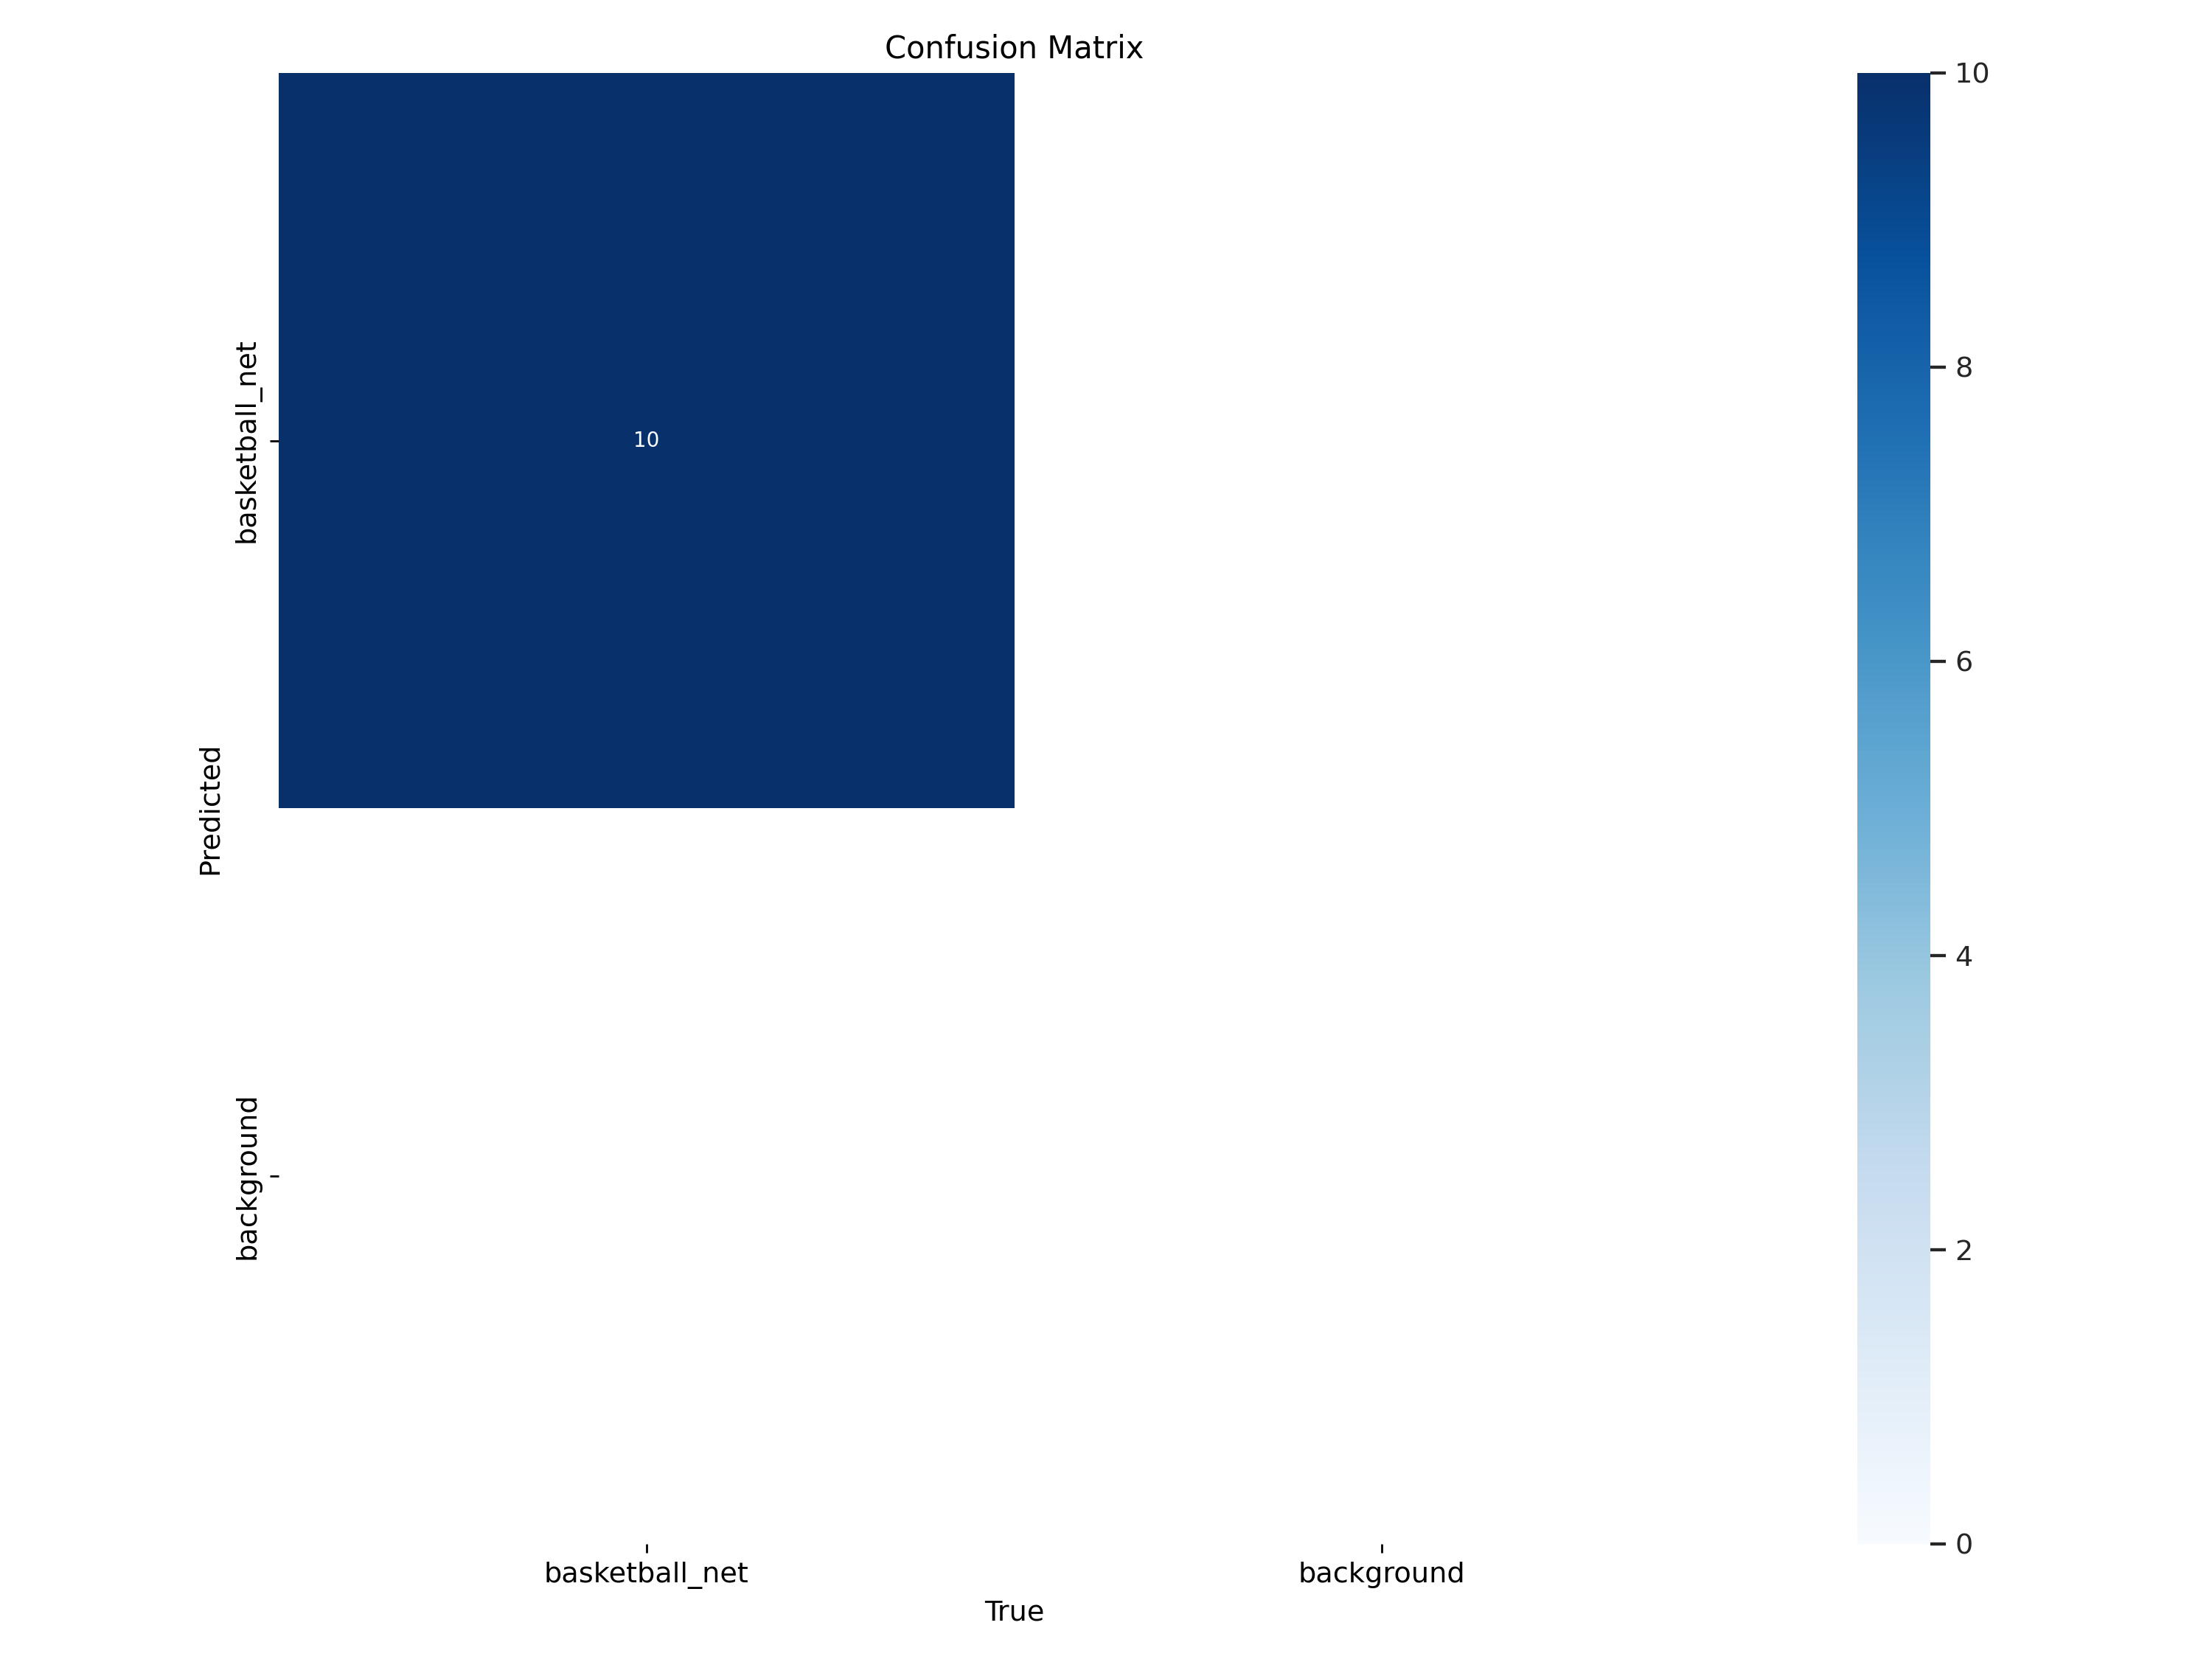

In [12]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

# **Model Validation**

In [14]:
#%cd {HOME}/datasets/basketball_net-1
#%ls

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={HOME}/datasets/basketball_net-3/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.1.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/basketball_net-3/valid/labels.cache... 11 images, 1 backgrounds, 0 corrupt: 100% 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.97it/s]
                   all         11         10      0.995          1      0.995      0.995
Speed: 0.2ms preprocess, 9.8ms inference, 0.0ms loss, 11.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# **Inference**

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/datasets/basketball_net-3/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.1.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/4 /content/datasets/basketball_net-3/test/images/video_2025-06-08_21-59-54_mp4-0013_jpg.rf.5a480e773f481a4cd66fc6ce924607ca.jpg: 384x640 1 basketball_net, 77.4ms
image 2/4 /content/datasets/basketball_net-3/test/images/video_2025-06-08_21-59-54_mp4-0026_jpg.rf.495f2b2a1e6474c14c6554b4b1d45722.jpg: 384x640 1 basketball_net, 10.8ms
image 3/4 /content/datasets/basketball_net-3/test/images/video_2025-06-08_21-59-54_mp4-0036_jpg.rf.075d34933da20271266aac388848ee68.jpg: 384x640 1 basketball_net, 10.7ms
image 4/4 /content/datasets/basketball_net-3/test/images/video_2025-06-08_21-59-54_mp4-0040_jpg.rf.919c13c73a847cac17683883c354304b.jpg: 384x640 1 basketball_net, 10.6ms
Speed: 1.7ms preprocess, 27.4ms inference, 33.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Lear

# **Result**

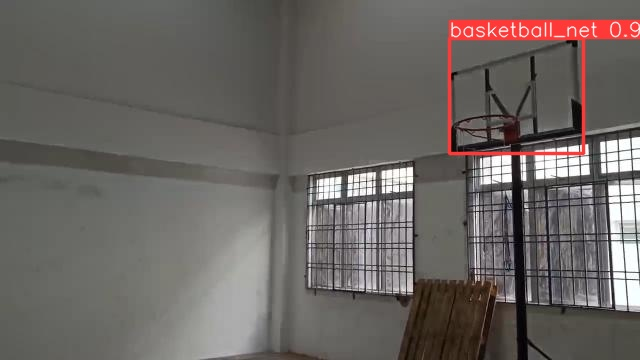

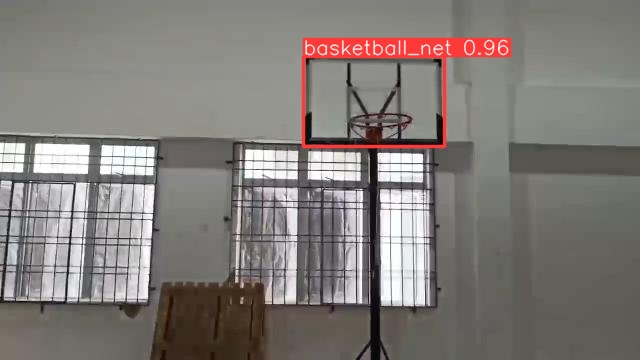

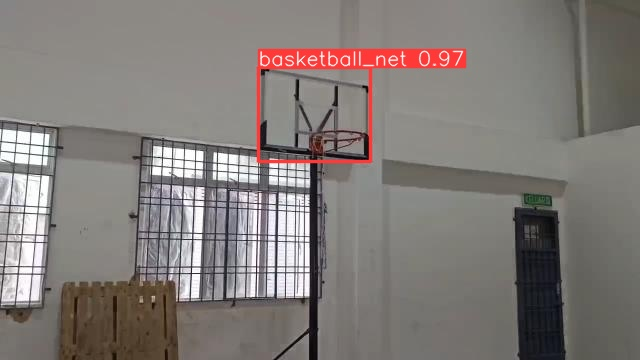

In [17]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

# **Export** **ONNX**

In [19]:
%cd {HOME}/runs/detect/train/weights/

from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("best.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'




/content/runs/detect/train/weights


Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.1.2+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 126.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.0s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.18.0 opset 17...
ONNX: export success ✅ 7.6s, saved as 'best.onnx' (42.6 MB)

Export complete (10.2s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=best.onnx imgsz=640  
Validate:        yolo val task=detect model=best.onnx imgsz=640 data=/content/datasets/basketball_net-3/data.yaml  
Visualize:    

'best.onnx'

# **Download** **ONNX**

In [21]:
%cd {HOME}/runs/detect/train/weights/

from google.colab import files

# Replace 'model.onnx' with the correct path to your exported model
files.download('best.onnx')
files.download('best.pt')

/content/runs/detect/train/weights


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>